#LGMVIP August Data Science Internship task 1
Stock Market Prediction And Forecasting Using Stacked LSTM _ (Uday Dogiparthi)

#Importhing Libraries


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline

#Collection of Data

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [ ]:
df = data.reset_index()['Open']
df.head()

0    234.05
1    234.55
2    240.00
3    233.30
4    233.55
Name: Open, dtype: float64

In [ ]:

df.shape

(2035,)

Text(0.5, 1.0, 'Open')

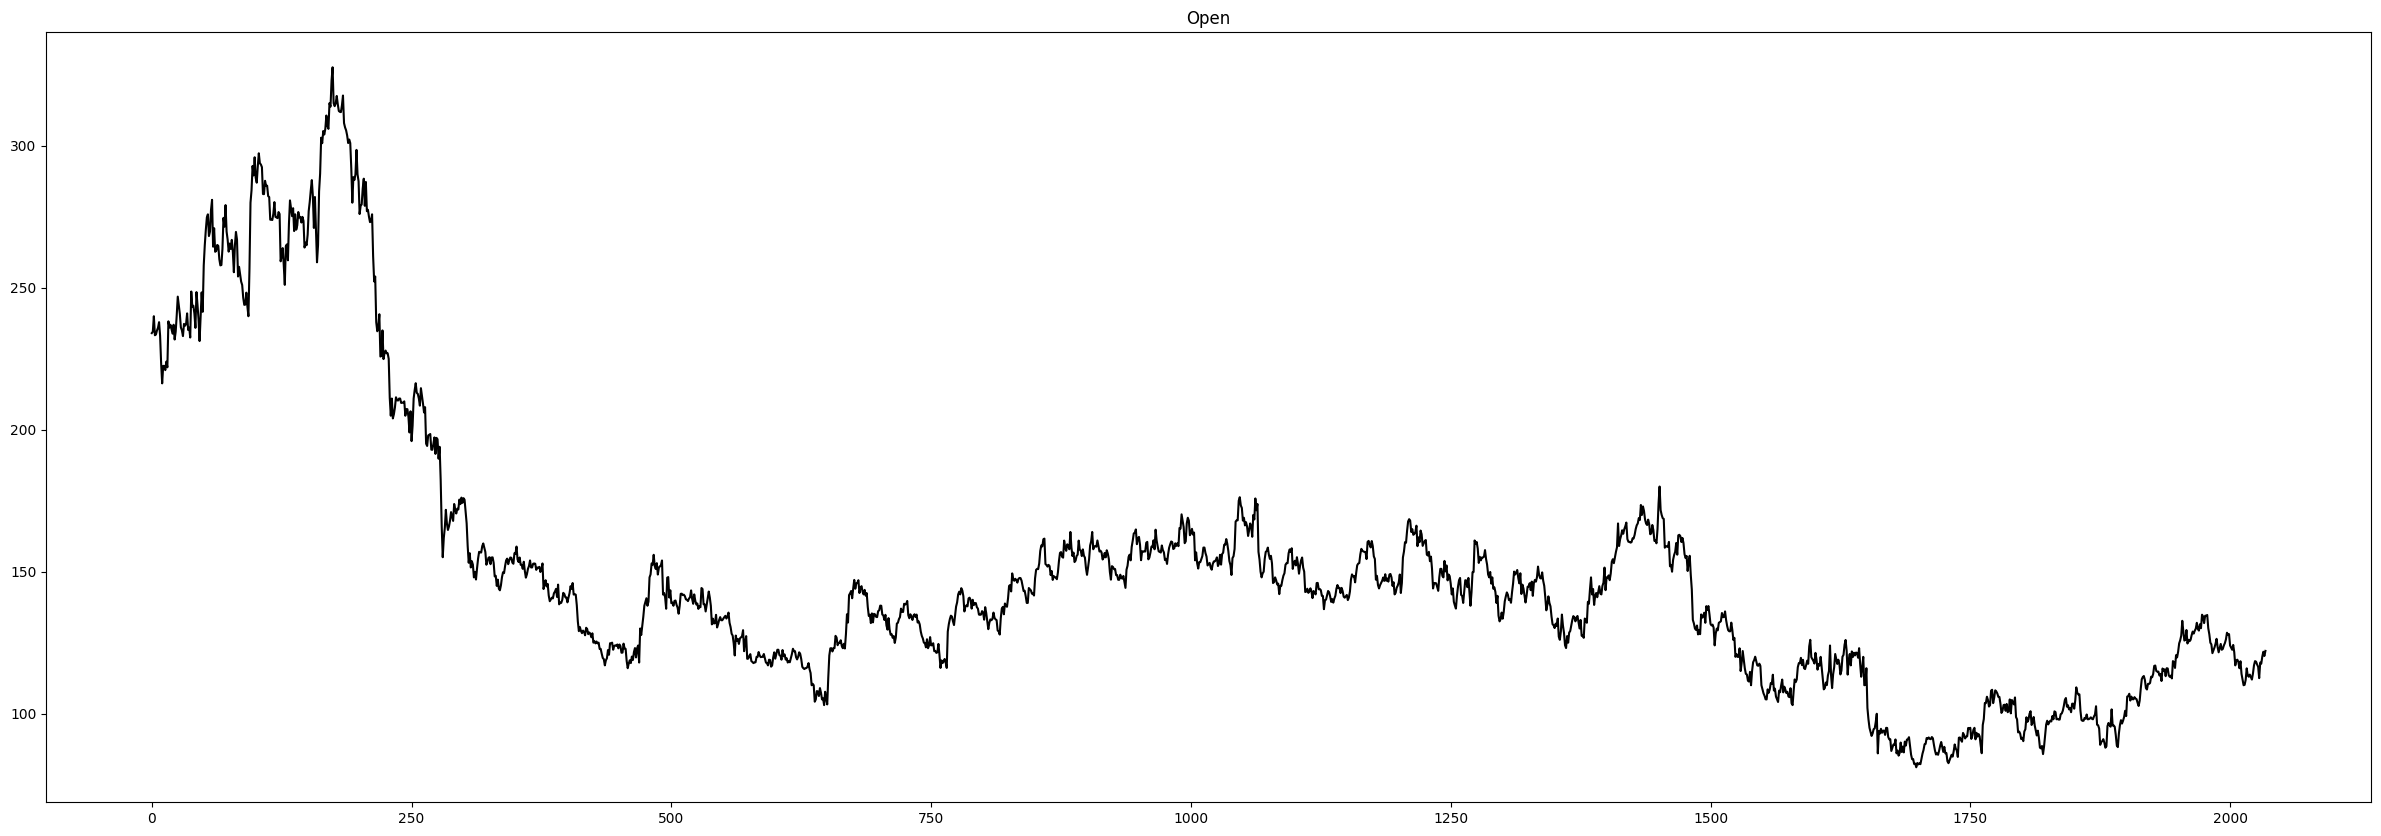

In [ ]:
plt.subplots(figsize = (30,10))
plt.plot(df , color ="black")
plt.title("Open")

#Preprocessing of Data(Train and Test)

In [ ]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [ ]:
print(df)

[[0.6202352 ]
 [0.62226277]
 [0.64436334]
 ...
 [0.16504461]
 [0.15896188]
 [0.16626115]]


In [ ]:
# Calculate training and testing sizes
training_size = int(len(df) * 0.75)
testing_size = len(df) - training_size

# Split data into train and test sets
train_data = df[:training_size, :]
test_data = df[training_size:, :1]

# Display training and testing sizes
print("Training Size:", training_size)
print("Testing Size:", testing_size)


Training Size: 1526
Testing Size: 509


In [ ]:
def dataset(dataset, time_step=1):
	dataX, dataY = [], []

	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a) # if steps = 100 then, 0-99 here
		dataY.append(dataset[i + time_step, 0]) # 100th element here as label

	return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 100 # taking previous 100 elements in consideration.

X_train, y_train = dataset(train_data, time_step)
X_test, ytest = dataset(test_data, time_step)

print(X_train.shape), print(y_train.shape)

(1425, 100)
(1425,)


(None, None)

In [ ]:

print(X_test.shape), print(ytest.shape)


(408, 100)
(408,)


(None, None)

#Creating an Stacked LSTM Model.

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


# defining the sequential model

model=Sequential()

model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
23/23 [==============================] - 12s 255ms/step - loss: 0.0370 - val_loss: 0.0071
Epoch 2/100
23/23 [==============================] - 6s 252ms/step - loss: 0.0034 - val_loss: 0.0011
Epoch 3/100
23/23 [==============================] - 5s 222ms/step - loss: 0.0017 - val_loss: 0.0021
Epoch 4/100
23/23 [==============================] - 6s 257ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 5/100
23/23 [==============================] - 5s 201ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 6/100
23/23 [==============================] - 6s 269ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 7/100
23/23 [==============================] - 6s 250ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 8/100
23/23 [==============================] - 5s 200ms/step - loss: 0.0012 - val_loss: 9.2316e-04
Epoch 9/100
23/23 [==============================] - 6s 258ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 10/100
23/23 [==============================] - 5s 201ms/step - loss: 0.0011 - v

#Predict the test data and plot the output.

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


# Transforming the results back to original scale

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


# Computing the RSME matrices


math.sqrt(mean_squared_error(y_train,train_predict))

13/13 [==============================] - 1s 67ms/step


164.91289808539793

In [ ]:
from sklearn.metrics import mean_squared_error
import math

# Calculate the root mean squared error
rmse = math.sqrt(mean_squared_error(ytest, test_predict))

math.sqrt(mean_squared_error(ytest,test_predict))

106.62217539272694

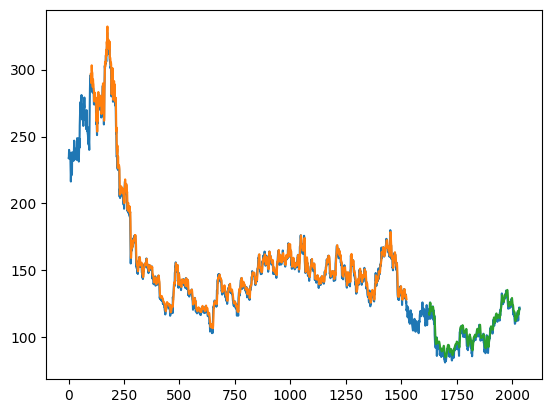

In [ ]:

# Plotting the results

# shift train predictions for plotting
look_back=100 #timestamp
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict

# plotting the train_predict and test_predict on the same plot as true data.
plt.plot(scaler.inverse_transform(df)) # to scale the data back to original scale.
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


#Predict the stock price for future 30 days.

In [ ]:
len(test_data)

509

In [ ]:
x_input=test_data[413:].reshape(1,-1)
x_input.shape

(1, 96)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=96
i=0
while(i<30):

    if(len(temp_input)>96):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)


[0.16950615]
97
1 day input [0.19525547 0.20437956 0.19870235 0.21796431 0.21553122 0.20600162
 0.21654501 0.21654501 0.2175588  0.19870235 0.19018654 0.17802109
 0.175588   0.16301703 0.16707218 0.17112733 0.17639903 0.18349554
 0.1717356  0.16423358 0.16991079 0.17619627 0.16788321 0.16909976
 0.17396594 0.17741281 0.18268451 0.19221411 0.18896999 0.19018654
 0.17396594 0.17092457 0.16788321 0.17477697 0.16443633 0.14557989
 0.15287916 0.15369019 0.15044607 0.14152474 0.15145985 0.13341444
 0.12530414 0.11719384 0.11780211 0.12489862 0.14132198 0.13098135
 0.12935929 0.13240065 0.12895377 0.12530414 0.13381995 0.14557989
 0.15166261 0.15085158 0.14679643 0.14355231 0.12733171 0.14963504
 0.14801298 0.15815085 0.16504461 0.15896188 0.16626115 0.16950615
 0.16950615 0.16950615 0.16950615 0.16950615 0.16950615 0.16950615
 0.16950615 0.16950615 0.16950615 0.16950615 0.16950615 0.16950615
 0.16950615 0.16950615 0.16950615 0.16950615 0.16950615 0.16950615
 0.16950615 0.16950615 0.16950615 

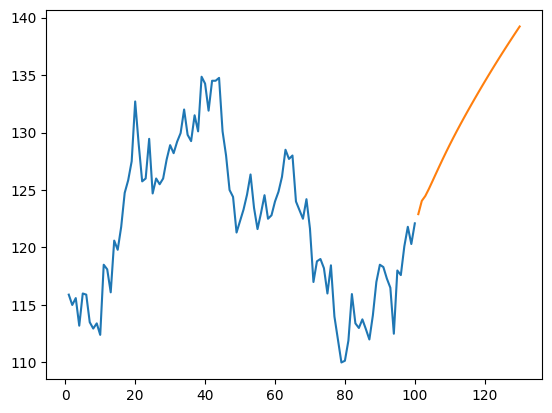

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)


len(df)
plt.plot(day_new,scaler.inverse_transform(df[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

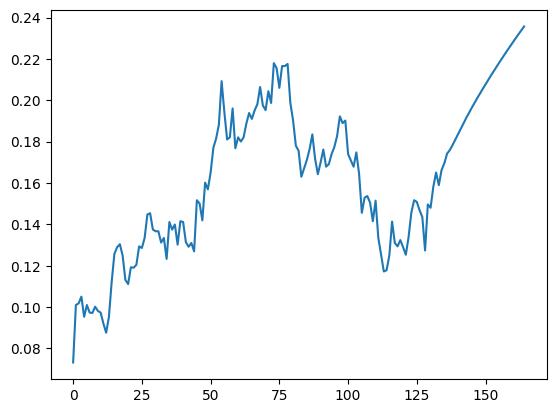

In [ ]:
# to get better visualization: -

df_b=df.tolist()
df_b.extend(lst_output)
plt.plot(df_b[1900:])